# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

<ipython-input-4-beec89bb13a8>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [6]:
#查看处理后的数据
data.shape

(108648, 11)

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [7]:
# 提示：查看train_test_split函数
#70%的训练集30%的测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据类型
print(type(X_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
data['SeriousDlqin2yrs'].value_counts()


0    101322
1      7326
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:>

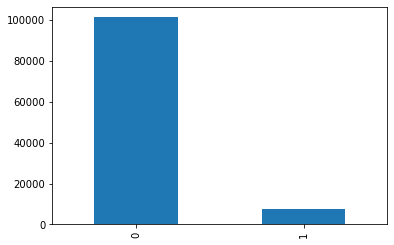

In [9]:
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
#第一种直接使用dataframe
data['SeriousDlqin2yrs'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

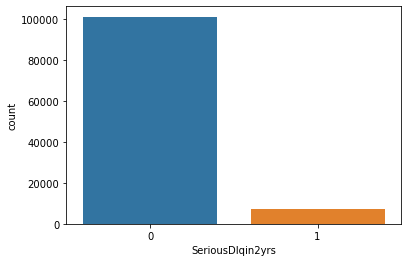

In [10]:
#第二中使用seaborn
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs', data=data)


#### 2.数据预处理之离散化

In [11]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

#计算分桶边界
import numpy as np

# 计算年龄的最小值和最大值
min_age = data['age'].min()
max_age = data['age'].max()

# 设置分桶的宽度（3岁一个区间）
bin_width = 3

# 生成分桶的边界
bins = np.arange(min_age, max_age + bin_width, bin_width)

print("分桶边界:", bins)

# 使用cut函数对测试集和训练集进行离散化
X_train['AgeGroup'] = pd.cut(X_train['age'], bins)
X_train.head()
X_test['AgeGroup'] = pd.cut(X_test['age'], bins)


分桶边界: [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105.]


#### 3.数据预处理之独热向量编码

In [12]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
# 使用get_dummies进行独热向量编码
#X_train
age_dummies = pd.get_dummies(X_train['AgeGroup'], prefix='AgeGroup')

# 将编码后的结果与原DataFrame进行合并
X_train = pd.concat([X_train, age_dummies], axis=1)

# 删除原始的年龄和分桶列
X_train.drop(['age', 'AgeGroup'], axis=1, inplace=True)

# 显示处理后的DataFrame
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"AgeGroup_(0.0, 3.0]","AgeGroup_(3.0, 6.0]","AgeGroup_(6.0, 9.0]","AgeGroup_(9.0, 12.0]","AgeGroup_(12.0, 15.0]","AgeGroup_(15.0, 18.0]","AgeGroup_(18.0, 21.0]","AgeGroup_(21.0, 24.0]","AgeGroup_(24.0, 27.0]","AgeGroup_(27.0, 30.0]","AgeGroup_(30.0, 33.0]","AgeGroup_(33.0, 36.0]","AgeGroup_(36.0, 39.0]","AgeGroup_(39.0, 42.0]","AgeGroup_(42.0, 45.0]","AgeGroup_(45.0, 48.0]","AgeGroup_(48.0, 51.0]","AgeGroup_(51.0, 54.0]","AgeGroup_(54.0, 57.0]","AgeGroup_(57.0, 60.0]","AgeGroup_(60.0, 63.0]","AgeGroup_(63.0, 66.0]","AgeGroup_(66.0, 69.0]","AgeGroup_(69.0, 72.0]","AgeGroup_(72.0, 75.0]","AgeGroup_(75.0, 78.0]","AgeGroup_(78.0, 81.0]","AgeGroup_(81.0, 84.0]","AgeGroup_(84.0, 87.0]","AgeGroup_(87.0, 90.0]","AgeGroup_(90.0, 93.0]","AgeGroup_(93.0, 96.0]","AgeGroup_(96.0, 99.0]","AgeGroup_(99.0, 102.0]","AgeGroup_(102.0, 105.0]"
64329,0.116959,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70087,0.050666,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
77642,0.038865,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6017,0.023513,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106521,0.039350,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
#X_test
age_dummies = pd.get_dummies(X_test['AgeGroup'], prefix='AgeGroup')

# 将编码后的结果与原DataFrame进行合并
X_test = pd.concat([X_test, age_dummies], axis=1)

# 删除原始的年龄和分桶列
X_test.drop(['age', 'AgeGroup'], axis=1, inplace=True)

# 显示处理后的DataFrame
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"AgeGroup_(0.0, 3.0]","AgeGroup_(3.0, 6.0]","AgeGroup_(6.0, 9.0]","AgeGroup_(9.0, 12.0]","AgeGroup_(12.0, 15.0]","AgeGroup_(15.0, 18.0]","AgeGroup_(18.0, 21.0]","AgeGroup_(21.0, 24.0]","AgeGroup_(24.0, 27.0]","AgeGroup_(27.0, 30.0]","AgeGroup_(30.0, 33.0]","AgeGroup_(33.0, 36.0]","AgeGroup_(36.0, 39.0]","AgeGroup_(39.0, 42.0]","AgeGroup_(42.0, 45.0]","AgeGroup_(45.0, 48.0]","AgeGroup_(48.0, 51.0]","AgeGroup_(51.0, 54.0]","AgeGroup_(54.0, 57.0]","AgeGroup_(57.0, 60.0]","AgeGroup_(60.0, 63.0]","AgeGroup_(63.0, 66.0]","AgeGroup_(66.0, 69.0]","AgeGroup_(69.0, 72.0]","AgeGroup_(72.0, 75.0]","AgeGroup_(75.0, 78.0]","AgeGroup_(78.0, 81.0]","AgeGroup_(81.0, 84.0]","AgeGroup_(84.0, 87.0]","AgeGroup_(87.0, 90.0]","AgeGroup_(90.0, 93.0]","AgeGroup_(93.0, 96.0]","AgeGroup_(96.0, 99.0]","AgeGroup_(99.0, 102.0]","AgeGroup_(102.0, 105.0]"
107294,0.128706,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39317,0.108896,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
40606,0.153372,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68931,0.067802,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20745,0.399198,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.数据预处理之幅度缩放

In [14]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
#是不是所有的数据除了年龄都进行幅度缩放
# 初始化 StandardScaler
scaler = StandardScaler()

# 对连续值特征进行幅度缩放
X_train[['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']] = scaler.fit_transform(X_train[['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']])

X_train.head()


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"AgeGroup_(0.0, 3.0]","AgeGroup_(3.0, 6.0]","AgeGroup_(6.0, 9.0]","AgeGroup_(9.0, 12.0]","AgeGroup_(12.0, 15.0]","AgeGroup_(15.0, 18.0]","AgeGroup_(18.0, 21.0]","AgeGroup_(21.0, 24.0]","AgeGroup_(24.0, 27.0]","AgeGroup_(27.0, 30.0]","AgeGroup_(30.0, 33.0]","AgeGroup_(33.0, 36.0]","AgeGroup_(36.0, 39.0]","AgeGroup_(39.0, 42.0]","AgeGroup_(42.0, 45.0]","AgeGroup_(45.0, 48.0]","AgeGroup_(48.0, 51.0]","AgeGroup_(51.0, 54.0]","AgeGroup_(54.0, 57.0]","AgeGroup_(57.0, 60.0]","AgeGroup_(60.0, 63.0]","AgeGroup_(63.0, 66.0]","AgeGroup_(66.0, 69.0]","AgeGroup_(69.0, 72.0]","AgeGroup_(72.0, 75.0]","AgeGroup_(75.0, 78.0]","AgeGroup_(78.0, 81.0]","AgeGroup_(81.0, 84.0]","AgeGroup_(84.0, 87.0]","AgeGroup_(87.0, 90.0]","AgeGroup_(90.0, 93.0]","AgeGroup_(93.0, 96.0]","AgeGroup_(96.0, 99.0]","AgeGroup_(99.0, 102.0]","AgeGroup_(102.0, 105.0]"
64329,-0.022432,-0.106906,0.090374,-0.244427,-0.327599,-0.060947,-0.943961,-0.054381,0.123702,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70087,-0.022674,-0.106906,-0.577713,0.192130,0.062406,-0.060947,-0.011137,-0.054381,-0.743866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
77642,-0.022717,-0.106906,-1.298500,-0.078536,-0.327599,-0.060947,-0.943961,-0.054381,-0.743866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6017,-0.022774,-0.106906,-0.177879,0.223765,-0.132596,-0.060947,0.921687,-0.054381,1.858837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106521,-0.022716,-0.106906,-0.496932,-0.333004,-1.107608,-0.060947,-0.943961,-0.054381,-0.743866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [15]:
#对X_test进行幅度缩放
scaler = StandardScaler()
X_test[['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']] = scaler.fit_transform(X_test[['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']])

X_test.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"AgeGroup_(0.0, 3.0]","AgeGroup_(3.0, 6.0]","AgeGroup_(6.0, 9.0]","AgeGroup_(9.0, 12.0]","AgeGroup_(12.0, 15.0]","AgeGroup_(15.0, 18.0]","AgeGroup_(18.0, 21.0]","AgeGroup_(21.0, 24.0]","AgeGroup_(24.0, 27.0]","AgeGroup_(27.0, 30.0]","AgeGroup_(30.0, 33.0]","AgeGroup_(33.0, 36.0]","AgeGroup_(36.0, 39.0]","AgeGroup_(39.0, 42.0]","AgeGroup_(42.0, 45.0]","AgeGroup_(45.0, 48.0]","AgeGroup_(48.0, 51.0]","AgeGroup_(51.0, 54.0]","AgeGroup_(54.0, 57.0]","AgeGroup_(57.0, 60.0]","AgeGroup_(60.0, 63.0]","AgeGroup_(63.0, 66.0]","AgeGroup_(66.0, 69.0]","AgeGroup_(69.0, 72.0]","AgeGroup_(72.0, 75.0]","AgeGroup_(75.0, 78.0]","AgeGroup_(78.0, 81.0]","AgeGroup_(81.0, 84.0]","AgeGroup_(84.0, 87.0]","AgeGroup_(87.0, 90.0]","AgeGroup_(90.0, 93.0]","AgeGroup_(93.0, 96.0]","AgeGroup_(96.0, 99.0]","AgeGroup_(99.0, 102.0]","AgeGroup_(102.0, 105.0]"
107294,-0.023364,-0.108718,2.164621,-0.195307,2.988128,-0.061567,2.729180,-0.054056,-0.748197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39317,-0.023452,-0.108718,-0.659066,-0.393237,0.648029,-0.061567,-0.938117,-0.054056,-0.748197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
40606,-0.023255,-0.108718,0.307337,-0.234893,0.063005,-0.061567,-0.021293,-0.054056,-0.748197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68931,-0.023635,-0.108718,-0.042059,0.770273,0.843038,-0.061567,-0.021293,-0.054056,0.127287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20745,-0.022162,-0.108718,-0.372841,0.833927,1.428062,-0.061567,0.895531,-0.054056,-0.748197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [16]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 创建 LogisticRegression 对象
model = LogisticRegression(max_iter=1000)#迭代1000次

# 使用模型进行拟合（fit）
model = model.fit(X_train, y_train)

# 获取特征系数
# 输出系数
coefficients = model.coef_[0]

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Coefficients:
RevolvingUtilizationOfUnsecuredLines: -0.014238696098413932
age: 1.7090490876987359
NumberOfTime30-59DaysPastDueNotWorse: 0.31179036078121564
DebtRatio: -0.1261455811859263
MonthlyIncome: -0.09534128900822961
NumberOfOpenCreditLinesAndLoans: 1.6563681693929426
NumberOfTimes90DaysLate: -0.19596759804041045
NumberRealEstateLoansOrLines: -3.19231164681595
NumberOfTime60-89DaysPastDueNotWorse: 0.111365865581903
NumberOfDependents: 0.0


#### age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines影响最多，但是NumberOfDependents为0是不是暗示上面的某个步骤出现了问题

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [17]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 准备参数网格
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# 使用训练数据进行网格搜索
grid_search.fit(X_train, y_train)


/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/linear_model/_logistic

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [18]:
# 输出最好的超参数
# 输出最好的模型

print("Best parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

best_model


Best parameters:  {'C': 1, 'penalty': 'l2'}


LogisticRegression(C=1, max_iter=1000)

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [19]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 在测试集上进行预测
y_pred = model.predict(X_test)



In [20]:
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9338548857186685
Recall: 0.04514048825426071
AUC: 0.6980820464291991
Confusion Matrix:
[[30341    83]
 [ 2073    98]]
F1 Score: 0.08333333333333333


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [21]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 设置阈值
threshold = 0.3

# 获取模型在测试集上的概率预测
y_prob = model.predict_proba(X_test)[:, 1]

# 根据阈值将概率转换为二分类标签
y_pred = (y_prob > threshold).astype(int)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


Accuracy: 0.933026537812548
Recall: 0.11239060340856748
AUC: 0.6980820464291991
Confusion Matrix:
[[30168   256]
 [ 1927   244]]
F1 Score: 0.18270310745039312


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [22]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

# 选择REF
from sklearn.feature_selection import RFE

# 创建 LogisticRegression 对象
model = LogisticRegression(max_iter=1000)

# 使用 RFE 进行特征选择
rfe = RFE(model, n_features_to_select=10)  # 选择前10个特征
X_train_rfe = rfe.fit_transform(X_train, y_train)

# 获取选择的特征名字
selected_features = X_train.columns[rfe.support_]
print(selected_features)
# 重新建模
model.fit(X_train_rfe, y_train)

# 准备参数网格
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# 使用训练数据进行网格搜索
grid_search.fit(X_train_rfe, y_train)

Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'AgeGroup_(18.0, 21.0]',
       'AgeGroup_(66.0, 69.0]', 'AgeGroup_(72.0, 75.0]',
       'AgeGroup_(75.0, 78.0]', 'AgeGroup_(78.0, 81.0]',
       'AgeGroup_(84.0, 87.0]', 'AgeGroup_(93.0, 96.0]'],
      dtype='object')


/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/linear_model/_logistic

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [23]:
rfe = RFE(model, n_features_to_select=10)  # 选择前10个特征
X_test_rfe = X_test[selected_features]
y_pred = model.predict(X_test_rfe)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = model.predict_proba(X_test_rfe)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9339469243749041
Recall: 0.036849378166743434
AUC: 0.669005190331326
Confusion Matrix:
[[30362    62]
 [ 2091    80]]
F1 Score: 0.06917423259835712


/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### 并没有明显提升

In [24]:
#使用决策树
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 创建 RandomForestClassifier 对象
model = RandomForestClassifier()

# 使用 SelectFromModel 进行特征选择
sfm = SelectFromModel(model, threshold=0.01)  # 根据重要度选择特征
X_train_sfm = sfm.fit_transform(X_train, y_train)

# 获取选择的特征名字
selected_features = X_train.columns[sfm.get_support()]

# 重新建模
model.fit(X_train_sfm, y_train)



RandomForestClassifier()

In [25]:
X_test_sfm = X_test[selected_features]
y_pred = model.predict(X_test_sfm)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = model.predict_proba(X_test_sfm)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9339776039269827
Recall: 0.1764163979732842


/home/xuenai/miniconda3/envs/icarogw/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


AUC: 0.8115473956110918
Confusion Matrix:
[[30060   364]
 [ 1788   383]]
F1 Score: 0.26250856751199453


### 比REF有一定的提升

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [26]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier



In [27]:
#随机森林
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=1)

In [28]:
y_pred = forest.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9340082834790612
Recall: 0.10870566559189314
AUC: 0.7641280678191342
Confusion Matrix:
[[30208   216]
 [ 1935   236]]
F1 Score: 0.1799466260007625


In [29]:
#SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0) 

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
y_pred = svm_classifier.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9334560515416475
Recall: 0.009212344541685858
Confusion Matrix:
[[30406    18]
 [ 2151    20]]
F1 Score: 0.01810774105930285


In [31]:
#SVM
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=2.0) #设置C=2

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9334560515416475
Recall: 0.009212344541685858
Confusion Matrix:
[[30406    18]
 [ 2151    20]]
F1 Score: 0.01810774105930285


### 计算时间极大的增加了

In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# 创建KNN分类器，这里设置K=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 在训练集上训练模型
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn_classifier.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9290995551464949
Recall: 0.12114233072316904
AUC: 0.6305229480156578
Confusion Matrix:
[[30021   403]
 [ 1908   263]]
F1 Score: 0.18540712019739164


In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# 创建KNN分类器，这里设置K=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# 在训练集上训练模型
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 计算召回率
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# 计算AUC
# 在测试集上获取预测的概率值
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# 计算F1分数
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.932750421843841
Recall: 0.08383233532934131
AUC: 0.6555683965712056
Confusion Matrix:
[[30221   203]
 [ 1989   182]]
F1 Score: 0.14241001564945227
